# Instructional Materials

These instructional materials are presented in the form of a [Jupyter Notebook](https://jupyter.org). Jupyter is a platform for interactive computing. The Notebook is a document format that allow for reading and writing both code and human-readable text. Jupyter Notebooks are composed of *cells*. Each cell can be [Markdown](https://daringfireball.net/projects/markdown/) text or Python code. Markdown cells are for writing human readable content and the code cells are for writing code! 

**Instructions on using the Interactive Notebook**

If you are running the interactive version of this notebook then you can execute the blocks of Python code interactively. When you see a block of Python code, first select the code cell by clicking on it. Once selected a cell will be surrounded by a blue line. You can execute a selected cell by selecting "Run Selected Cells" in the *Run* menu at the top of the window, by clicking the play button in the menu bar at the top of the window, or by pressing the shift-return keys on your keyboard.

## Introduction

The purpose of this module is to demonstrate how to use computational methods to work with Open Civic Data to answer a data driven question as discussed in [Module 5.1: Asking Data Driven Questions](https://civic-switchboard.gitbook.io/education-series/segment-5-using-community-data/module-5.1-asking-data-driven-questions).

There are many ways you can use computation to manipulate data. Spreadsheet applications like Microsoft Excel or Google Sheets are popular because of their ease of use. However, it is also possible to manipulate data using computer programming to automate the same processes that can be done with spreadsheets. In this module, we are going to demonstrate how to work with open civic data using the Python programming language.

*Why Python?* By using a programming language we can *show our work* by writing code to perform data manipulations, rather than interacting with a graphical user interfaces where the history of our clicks are lost in the moment.

### Caveats

This notebook has been designed to you to read and follow the computations by executing the code cells as you progress through the notebook. You do not need to write your own code or understand Python programming to follow the materials. The activities involve modifying code, but the instructions for how to do so are included.

If you are interested in learning more about Python programming, we recommend the [Python 4 Everybody](https://www.py4e.com) book and online course as a starting point.

The goal of this module is to demonstrate the programmatic manipulation and transformation of data. These materials will discuss what the Python is doing from a conceptual perspective rather than provide a detailed explaination of the code.

## Asking a Data Driven Question

In this module we are going to answer the question: *What neighborhood in Pittsburgh uses the most Wifi at a Public Library?*

To fully answer this question we are going to need to work with three datasets:
- [CLP Public Wifi](https://data.wprdc.org/dataset/clp-public-wifi)
- [CLP Library Locations](https://data.wprdc.org/dataset/libraries)
- [Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)

Answering this question requires the following manipulations:
  - **Joining** - Joining operations merge separate datasets together by finding shared values. If we look at the CLP Public Wifi data, the dataset has no information about neighborhoods. We need to enrich the Wifi data with additional columns by *joining* it with other datasets.
  - **Aggregation** - Aggregation operations will reduce the size of a dataset by reducing multiple values in rows and/or columns into a single value. Each datapoint of the CLP Public Wifi data represents an individual session. There are a lot of sessions! The data needs to be aggregated to be more comprehensible. This requires a mathematical operation to combine the datapoints together and produce a single, meaningful value.

## Downloading the CLP Public Wifi Data

As discussed in [Module 3.5: File Formats for Open Civic Data](https://civic-switchboard.gitbook.io/education-series/segment-3-preparing-libraries-for-sharing-their-data/module-3.5-file-formats-for-open-civic-data), it is important for the data to be downloadable in an open, machine-readable format. The WPRDC provides the CLP Public Wifi data in the CSV or Comma Separate Values file format. CSV is the most common format for saving tabular data as a file.

If you click and download the CLP Public Wifi as CSV you should note, the default filename is a very confusing string of numbers and letters, `20843d56-506f-44b1-83df-5b16ee865783.csv` This is an automatically generated filename by the WPRDC database.

We have already downloaded and renamed the CLP Public Wifi data and included it as part of these instructional materials. You can double click on the file `clp-public-wifi.csv` in the file browser on the left side of the window to take a look at the data file in Jupyter.  

### Loading the Data

When we download the CLP Public Wifi data to our local computer, this gives us the ability to open and work with the dataset in an application of our choosing. Often the default application for working with tabular data in the CSV file format is Microsoft Excel. In our case, we will be using Jupyter and the Python programming language to open and manipulate our data.

To start, we must load a Python library called [Pandas](https://pandas.pydata.org/). Pandas is a data anlysis library for the Python programming language that makes working with tabular data easy and fun! Loading Pandas is like opening the Excel application on our computer.

In [1]:
# load the Python libraries for working with data
import pandas

Now we can use the pandas `read_csv` function to load the data from our hard drive into memory so it can be manipulated with Python code. When we load the data in Python we need to assign the data to a variable, in this case we use a variable called `wifi_data`.

If we were using Excel, this would be like opening the CSV file.

In [2]:
# read the csv and save the data in a variable called wifi_data
wifi_data = pandas.read_csv("clp-public-wifi.csv")

It worked! But we don't see anything!? Working with data in Python is a bit different then using a graphical interface like Excel. With Python all of our interactions are text based commands rather than clicking with the mouse. So if we want to see the data we need to tell Python we want to look at it.

Using the `head` function we can tell Python to display the top or "head" of the tabular dataset. The default is five rows.

In [3]:
# display the first 5 rows of the data
wifi_data.head()

,CLPID,Name,Year,Month,WifiSessions,WifiMinutes
0,CLP01,ALLEGHENY LIBRARY,2016,1,1037,148513
1,CLP01,ALLEGHENY LIBRARY,2016,2,1064,150948
2,CLP01,ALLEGHENY LIBRARY,2016,3,949,129484
3,CLP01,ALLEGHENY LIBRARY,2016,4,934,136196
4,CLP01,ALLEGHENY LIBRARY,2016,5,1018,135793


Usually, you don't want to display every row in a dataset because many datasets are so large they will overflow your screen! If we want to get a sense of the size of our dataset, we can use the `len()` function to determine the "length" (number of rows) in our data.

In [4]:
# return the number of rows in the data
len(wifi_data)

532

This output is simply a number and fortunately this matches up with what the data looked like when we looked at it on the [WPRDC website](https://data.wprdc.org/dataset/clp-public-wifi/resource/20843d56-506f-44b1-83df-5b16ee865783?view_id=251a99da-b3b5-4cdd-a64c-716dcf80275d), 532 rows.

## Answering Data Driven Questions

Now that the data has been loaded into Python with Pandas, we are able to perform calculations to learn more about the data. Even with this dataset we can begin to learn a bit about wifi usage at the Carnegie Libraries of Pittsburgh.

### Total WiFi Minutes

For example, what is the total usage of wifi minutes at all CLP locations? To answer this question, we can add together all of the values in the `WifiMinutes` column in the data. This *sum* will represent the total number of minutes the wifi has been used at all CLP locations over the period of time represented by the dataset.

In [5]:
# compute the sum of the WifiMinutes column
wifi_data["WifiMinutes"].sum()

114514102

That's a lot of minutes! How many hours, days, years would that be? To answer this question, we must take that total number of minutes and perform a series of mathematical calculations to determine hours, days, and years.

In [6]:
# compute total minutes and save in a variable
total_minutes = wifi_data["WifiMinutes"].sum()

# compute the number of hours
total_hours = total_minutes / 60
print("Total Hours:", total_hours)

# compute the number of days
total_days = total_hours / 24
print("Total Days:", total_days)

# compute the number of years
total_years = total_days / 365
print("Total Years:", total_years)

Total Hours: 1908568.3666666667
Total Days: 79523.68194444444
Total Years: 217.873101217656


WOW! That is a lot of years! Over 200!? That seems like a lot. Remember, this number represents the cumulative amount of time people have been using the internet at all of the CLP library locations.

This leads to another question, how many people have been using the public Wifi at CLP? How much time do they spend on the internet?

In [7]:
# compute the total number of wifi sessions by calculating the sum of the WifiSessions column
wifi_data["WifiSessions"].sum()

863530

So this number tells us how many times someone connected to the public Wifi. With this information we could get a sense of how long people are using the internet every time they connect.

In [8]:
# compute the total sessions and save to a variable
total_sessions = wifi_data["WifiSessions"].sum()

# compute the average number of minutes for teach session
total_minutes / total_sessions

132.61160816647944

So this means, on average, people used the wireless internet for about two hours and 12 minutes.

### Recreating the WPRDC Chart

If you visit the [CLP Public Wifi](https://data.wprdc.org/dataset/clp-public-wifi) web page, you will see a shart showing Wifi usage for 2017. We can recreate that chart using Python!

TypeError: set_xticks() got an unexpected keyword argument 'labels'

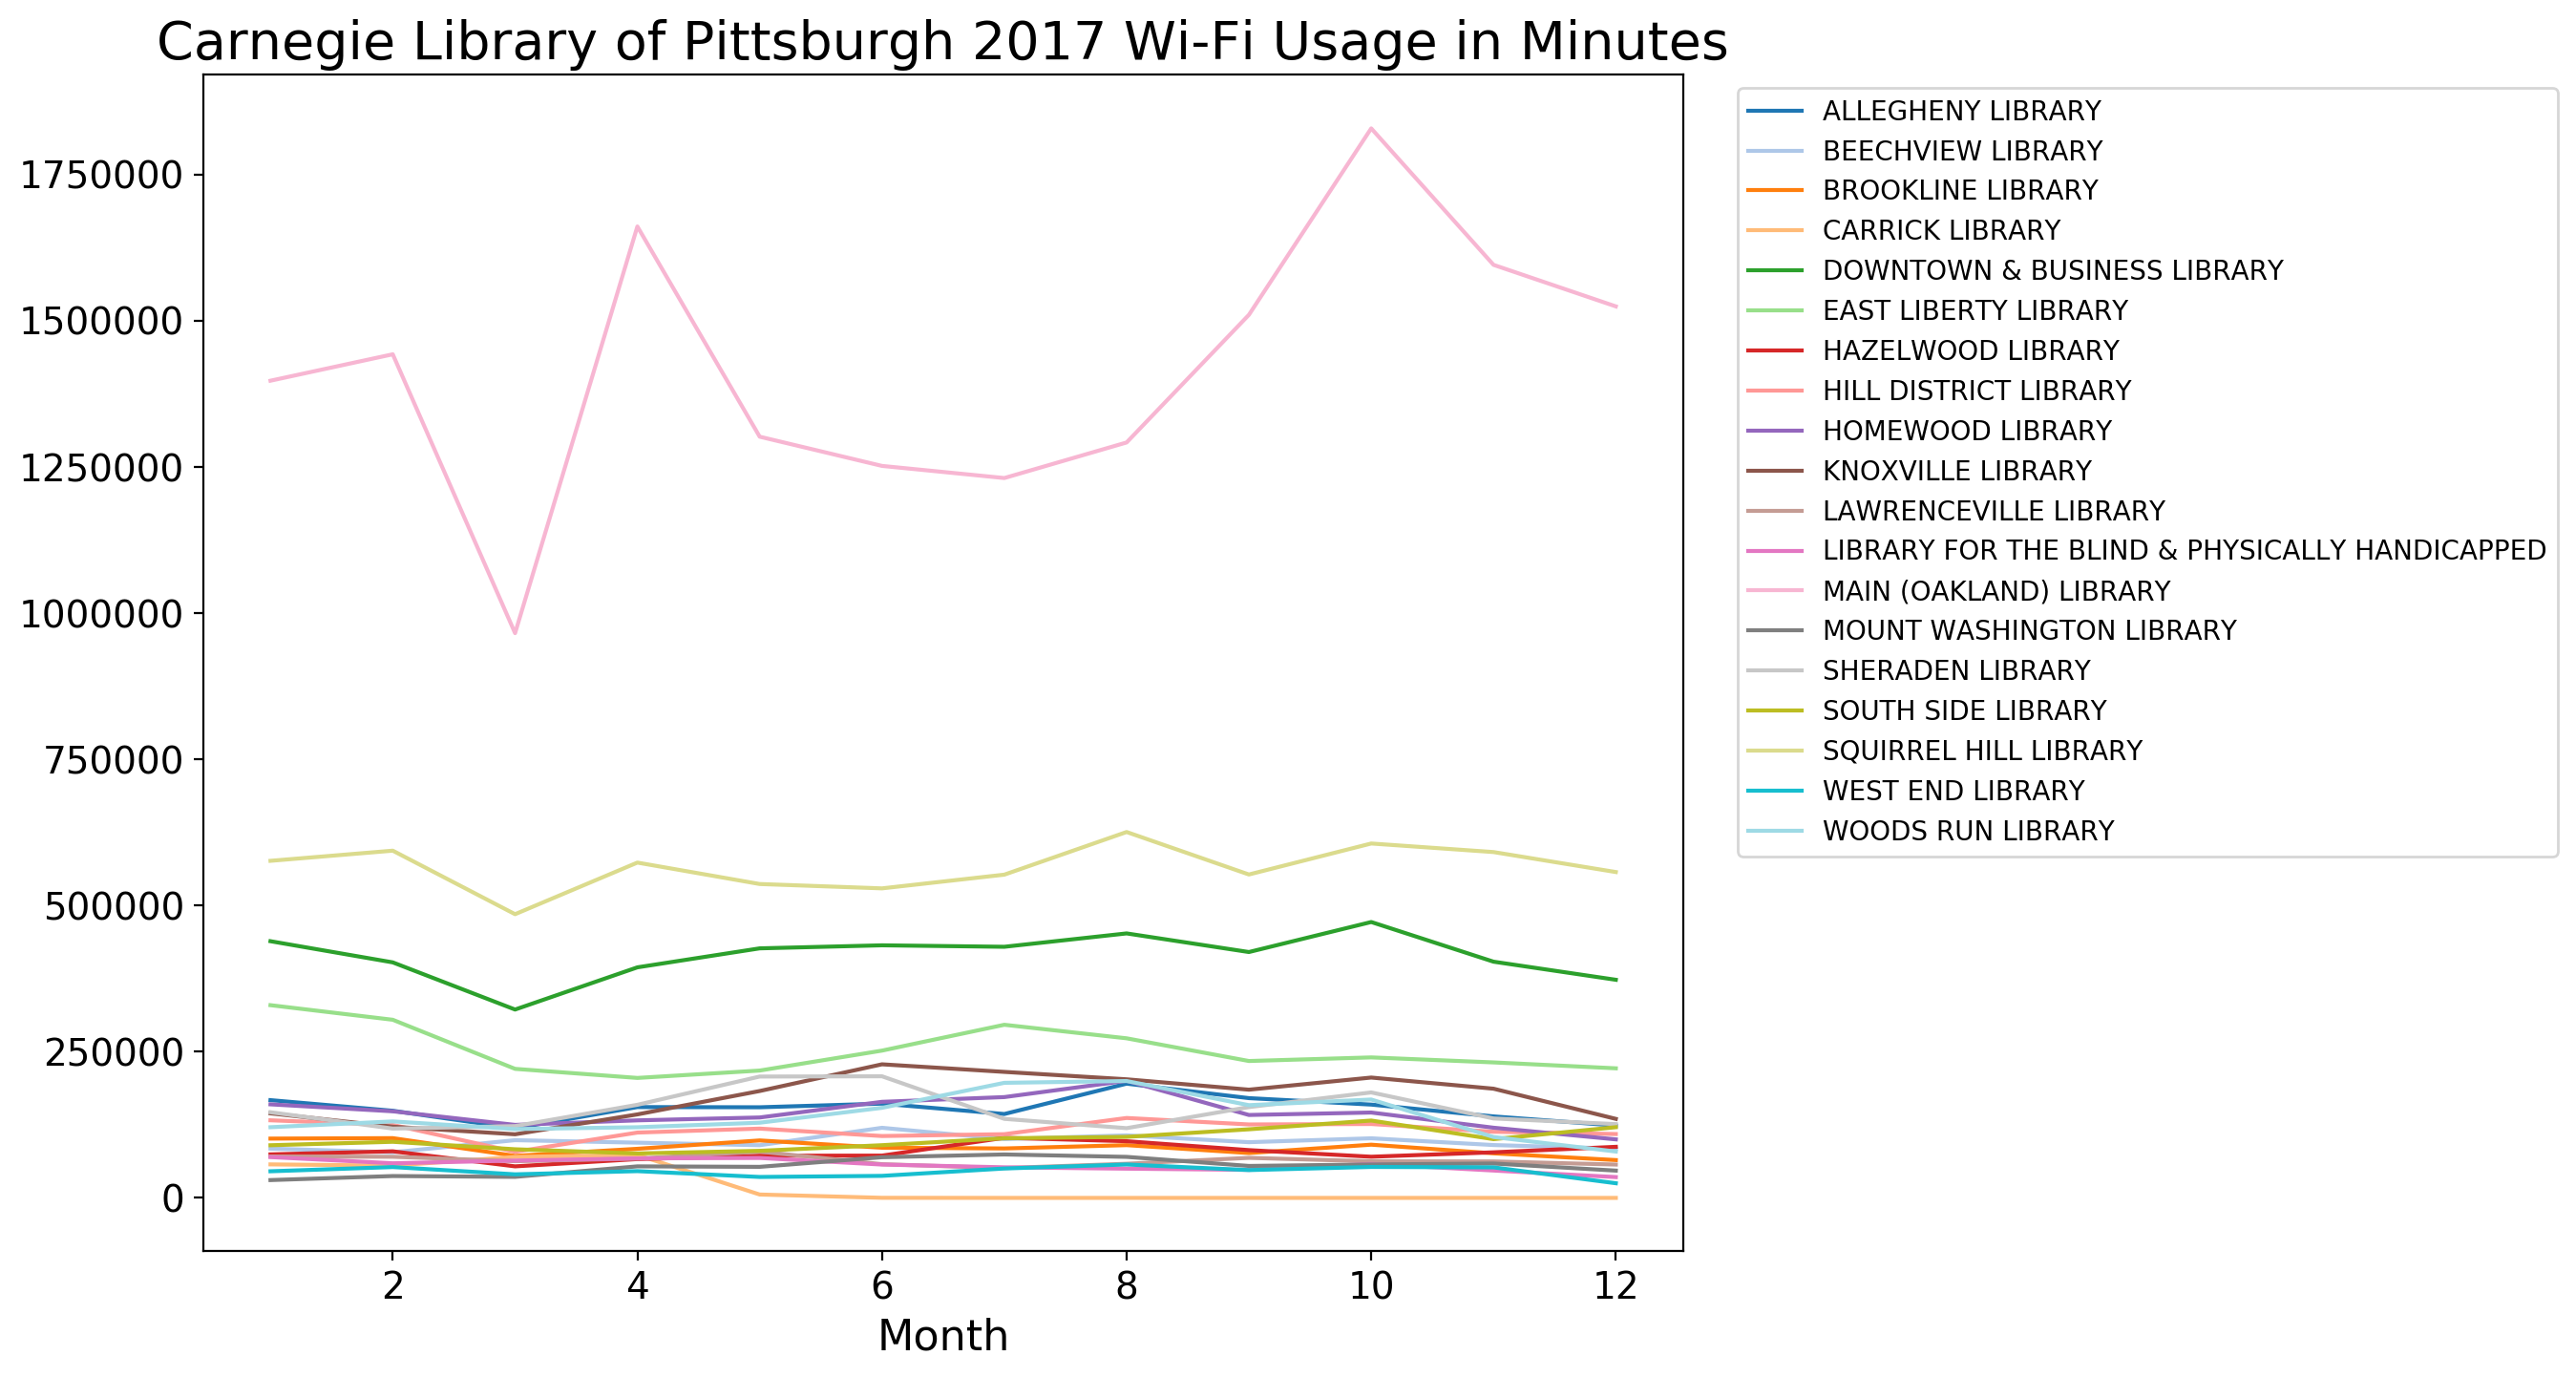

In [9]:
# Specify the year in a variable
year = 2017

# Select data for specified year, group by library/month, and aggregate by the adding together the minutes
wifi_data_subset = wifi_data[wifi_data['Year'] == year].groupby(["Name", "Month"], as_index=False)["WifiMinutes"].sum()

# Reshape the data so it is easier to plot by Month
reshaped_wifi_data_subset = wifi_data_subset.pivot_table(index="Month", columns="Name", values="WifiMinutes")

# plot the data
ax = reshaped_wifi_data_subset.plot(figsize=(10,8),
                                  title=f"Carnegie Library of Pittsburgh {year} Wi-Fi Usage in Minutes",
                                  colormap="tab20",
                                  fontsize=14)
# clean up the text
ax.xaxis.label.set_size(16)
ax.title.set_size(20)
ax.legend(loc="upper right", bbox_to_anchor=(1.6,1))
ax.ticklabel_format(style="plain")

# add the Month abreviations instead of numbers
ax.set_xticks(ticks=range(1,13),labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug","Sep","Oct","Nov","Dec"]);


## Joining Datasets To Find Neigborhoods

To answer our motivating question, *What neighborhood uses the most WiFi?*, we need additional data. As we have seen above, there is no neighborhood information in the CLP Public WiFi data. In fact, there is very little information about any of the libraries.

Fortunately, the Carnegie Library of Pittsburgh has posted another dataset on the WPRDC that has a bunch of information about each library location.

The [Library Locations](https://data.wprdc.org/dataset/libraries) dataset includes a bunch of information about each CLP branch including "address, phone number, square footage, and standard operating hours." Unfortunately, it does not include is neighborhood information, but it does have GPS locations for library!

If we want to obtain neighborhood information for each library, we could spend some time and manually look up it up for each of the 19 locations. But we can also use Python programming to automate the process of looking up each library location and determining the neighborhood. To do this we will use the GPS location of each library location and look it up in a geographic dataset of Pittsburgh's neighborhoods.

The WPRDC hosts another dataset, [Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2), which is a geographic dataset representing the spatial area of each of the 90 neighborhoods in Pittsburgh. What is useful about this dataset is that you can use computational methods to determine in which spatial area a particula GPS coordinate resides. What this means is we can use the GPS data from the library locations dataset and programmatically determine the neighborhood for each library location.

By performing these computations we can add a new column to the library locations dataset that includes the neighborhood name. In this way we are **joining** two datasets together to enrich one of the datasets with information from the other.

### Loading the Library Locations Data

The WPRDC also hosts a [Library Locations](https://data.wprdc.org/dataset/libraries/resource/14babf3f-4932-4828-8b49-3c9a03bae6d0?view_id=f34cd02e-17eb-40aa-8f86-ae51968db84a) dataset that includes a bunch of information about each of the libraries in the CLP system.

This dataset has 19 entries for each of the 19 libraries. For each library, we have the following pieces of information:

- CLPID
- Name
- Address
- City
- Zip4
- County
- Phone
- SqFt
- The opening times for each day of the week
- The closing times for each day of the week
- Latitude
- Longitude

Most of the data in this dataset is location information for each of the locations, but it also includes some information about the library itself, namely how big and when it is open.

In [10]:
# load the library locations dataset into the variable library_data
library_data = pandas.read_csv("clp-library-locations.csv")

In [11]:
# display the first five rows of the library location data
library_data.head()

,CLPID,Name,Address,City,State,Zip4,County,Phone,SqFt,MoOpen,...,ThOpen,ThClose,FrOpen,FrClose,SaOpen,SaClose,SuOpen,SuClose,Lat,Lon
0,CLP01,ALLEGHENY LIBRARY,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,Allegheny,(412) 237-1890,15005,10:00:00,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613
1,CLP02,BEECHVIEW LIBRARY,1910 BROADWAY AVE,PITTSBURGH,PA,15216-3130,Allegheny,(412) 563-2900,8000,10:00:00,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.407026,-80.027741
2,CLP03,BROOKLINE LIBRARY,708 BROOKLINE BLVD,PITTSBURGH,PA,15226-2102,Allegheny,(412) 561-1003,12651,10:00:00,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.394399,-80.021427
3,CLP04,CARRICK LIBRARY,1811 BROWNSVILLE RD,PITTSBURGH,PA,15210-3907,Allegheny,(412) 882-3897,4000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.397019,-79.987547
4,CLP05,DOWNTOWN & BUSINESS LIBRARY,612 SMITHFIELD ST,PITTSBURGH,PA,15222-2506,Allegheny,(412) 281-7141,12709,08:30:00,...,08:30:00,18:00:00,08:30:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.441749,-79.997112


### Working with Geographic Data

* WPRDC publishes a dataset of Pittsburgh Neighborhoods.
* [Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)
* This is a *geographic* dataset which means it requires some special Python libraries for opening and working with the data

We need 3rd party library called [shapely](http://shapely.readthedocs.io) which will be used to encode GPS coordinates into geographic points. Then we will use the [Geopandas](https://geopandas.org/en/stable/) library to perform joining operations to determine the neighborhood for each GPS coordinate.

In [12]:
# load up the necessary geographic libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from numpy import nan

### Loading Geographic Data Files

You need to have a geographic dataset that represents the units of interest. Included in these materials is a [geojson](https://en.wikipedia.org/wiki/GeoJSON) file, `neighborhoods.geojson` that encodes all the neighborhoods in Pittsburgh. 

In [13]:
# load the neighborhood geojson file
pgh_neighborhoods = gpd.read_file("neighborhoods.geojson")

## Visualizing Geographic Data

With the Pittsburgh neighborhood data loaded into Geopandas, we can now manipulate and visualize the geographic data just like our tabular data above. Each neighborhood in the dataset can be represented in a variety of ways. The default is to view the geographic data in a tabular format.

In [14]:
# take a peak at what these data look like
pgh_neighborhoods

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_number,plannerassign,created_user,created_date,last_edited_user,last_edited_date,temp,Shape__Area,Shape__Length,geometry
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.068796e+07,19600.573085,"POLYGON ((-80.02999 40.45909, -80.02989 40.458..."
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.133208e+07,21174.473326,"POLYGON ((-80.01078 40.49975, -80.01073 40.499..."
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,8.743618e+06,13811.917169,"POLYGON ((-80.00327 40.48271, -80.00325 40.482..."
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.754935e+07,18197.745741,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,2.522420e+07,26390.549314,"POLYGON ((-80.01422 40.47745, -80.01435 40.477..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1378,251,42,003,320400,3,420033204003,Block Group 3,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,2.338689e+07,31964.844864,"POLYGON ((-79.99633 40.39458, -79.99630 40.394..."
86,1379,265,42,003,563000,4,420035630004,Block Group 4,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,3.683820e+06,9978.225999,"POLYGON ((-80.06919 40.46046, -80.06912 40.460..."
87,1380,358,42,003,562500,1,420035625001,Block Group 1,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,6.425358e+06,25260.814467,"POLYGON ((-80.05154 40.46364, -80.05140 40.463..."
88,1381,298,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26.924999+00:00,pgh.admin,2020-08-14T14:52:26.924999+00:00,None,1.027920e+07,16308.247349,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."


Tabular representations of geographic data are boring!

The most common way to visualize geographic data is to make maps! The visualization below is just another representation of the neighborhoods' data. Note, the color is being used only to signify a different neighborhood, it doesn't have any particular value or meaning.

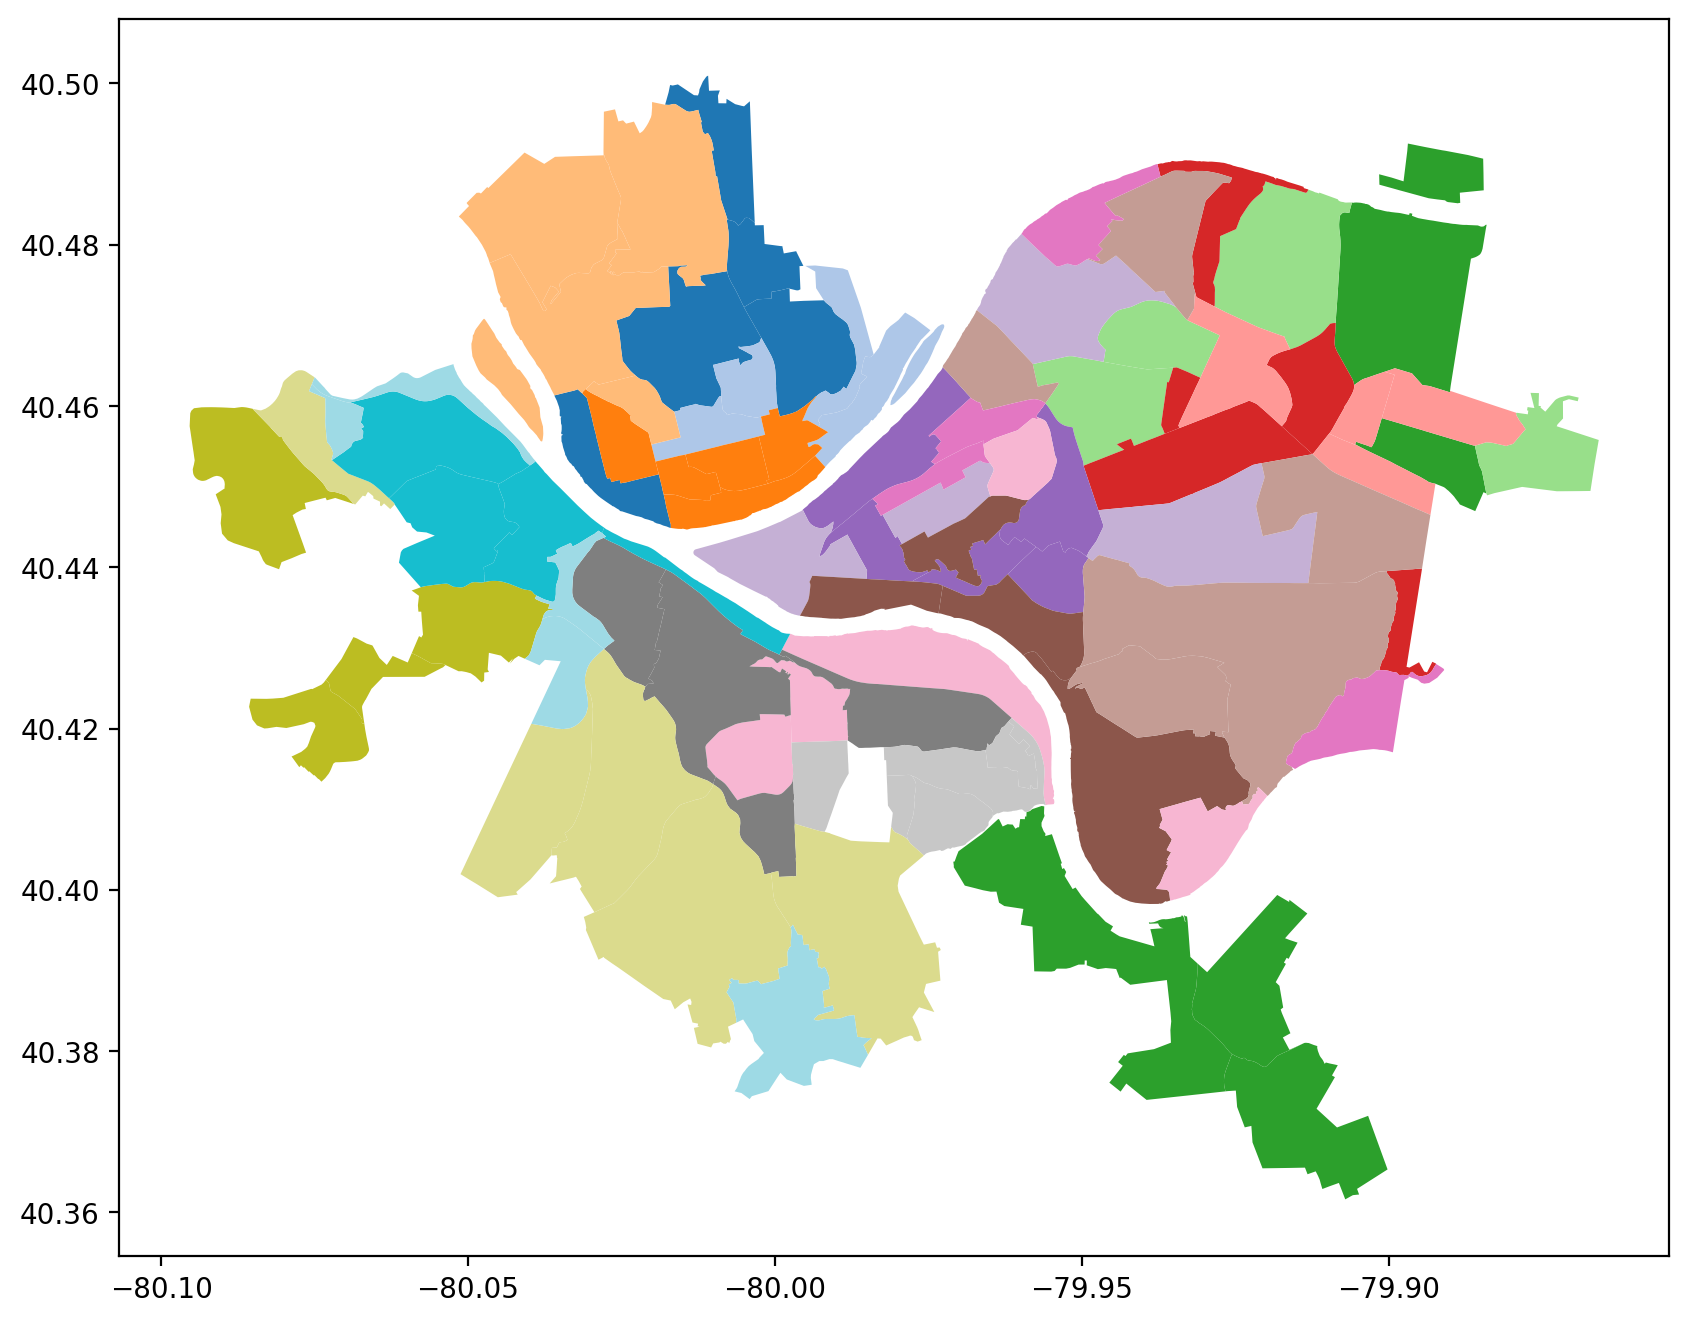

In [15]:
# plot the map using standard pandas plotting functions
pgh_neighborhoods.plot(figsize=(10,10), cmap="tab20"); #add semicolon to prevent ugly output

## Adding Neighborhood Names with Geographic Queries

Pandas and Geopandas have a lot of handy built-in functions, but they does not include a function that can perform the geographic query we need to translate GPS coordinates into a neighborhood name. We need to do is use a special dataframe function, `apply()` that allows us to create our own custom function that will be *applied* to every row of the data. 

We need to create a python function that does the following:
* Take a row of the library locations data as input
* Convert the latitude and longitude columns of that row to a single "Point" object
* Perform a lookup in the `pgh_neighborhoods` data to see if that Point, those coordinates exists in our geographic dataset
* Return the name of the neighborhood if it exists or return `NaN`

By "applying" our new function to the library location data, a new column of neighborhood names  will be added to the data. While we only have 19 library locations and manually adding this column would not be too difficult, what if we had 100 or 1000 library locations? Automating this process allows us to process much larger datasets.

In [16]:
# create a function that we will supply to apply
def reverse_geolocate_neighborhood(row):
    """Given a row, grab the latitude and longitude columns and
    return the neighborhood name (or nan for locations outside the dataset)."""

    # get the latitude and longitude
    latitude = float(row['Lat'])
    longitude = float(row['Lon'])

    # create a shapely point from the GPS coordinates
    location = Point(longitude, latitude)

    # make a query mask and query the data on that location
    location_query = pgh_neighborhoods['geometry'].contains(location)
    result = pgh_neighborhoods[location_query]

    # if the location isn't in dataset it will be empty
    if result.empty:
        # location isn't within Pittsburgh, return not-a-number
        return nan
    else:
        # return a string of the "hood" where the point was located
        return result.iloc[0]['hood']

Now we can give our `reverse_goelocate_neighborhood` function as a parameter to the [dataframe apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) function and Pandas process every row of the data using our custom function. This will create a new column with all the neighborhood names.

In [17]:
# perform reverse geocoding with every row in the library data
# save results as a new column in our tree dataframe
library_data['neighborhood'] = library_data.apply(reverse_geolocate_neighborhood, axis=1)

# display the update librar data
library_data

,CLPID,Name,Address,City,State,Zip4,County,Phone,SqFt,MoOpen,...,ThClose,FrOpen,FrClose,SaOpen,SaClose,SuOpen,SuClose,Lat,Lon,neighborhood
0,CLP01,ALLEGHENY LIBRARY,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,Allegheny,(412) 237-1890,15005,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613,Central Northside
1,CLP02,BEECHVIEW LIBRARY,1910 BROADWAY AVE,PITTSBURGH,PA,15216-3130,Allegheny,(412) 563-2900,8000,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.407026,-80.027741,Beechview
2,CLP03,BROOKLINE LIBRARY,708 BROOKLINE BLVD,PITTSBURGH,PA,15226-2102,Allegheny,(412) 561-1003,12651,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.394399,-80.021427,Brookline
3,CLP04,CARRICK LIBRARY,1811 BROWNSVILLE RD,PITTSBURGH,PA,15210-3907,Allegheny,(412) 882-3897,4000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.397019,-79.987547,Carrick
4,CLP05,DOWNTOWN & BUSINESS LIBRARY,612 SMITHFIELD ST,PITTSBURGH,PA,15222-2506,Allegheny,(412) 281-7141,12709,08:30:00,...,18:00:00,08:30:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.441749,-79.997112,Central Business District
5,CLP06,EAST LIBERTY LIBRARY,130 SOUTH WHITFIELD ST,PITTSBURGH,PA,15206-3806,Allegheny,(412) 363-8232,40000,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.460963,-79.926502,East Liberty
6,CLP07,HAZELWOOD LIBRARY,5006 SECOND AVE,PITTSBURGH,PA,15207-1625,Allegheny,(412) 421-2517,7000,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.409805,-79.943849,Hazelwood
7,CLP08,HILL DISTRICT LIBRARY,2177 CENTRE AVE,PITTSBURGH,PA,15219-6316,Allegheny,(412) 281-3753,8333,10:00:00,...,17:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.445471,-79.976706,Middle Hill
8,CLP09,HOMEWOOD LIBRARY,7101 HAMILTON AVE,PITTSBURGH,PA,15208-2847,Allegheny,(412) 731-3080,28776,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.455284,-79.899213,Homewood South
9,CLP10,KNOXVILLE LIBRARY,400 BROWNSVILLE RD,PITTSBURGH,PA,15210-2251,Allegheny,(412) 381-6543,6700,10:00:00,...,17:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.413186,-79.989149,Knoxville


The code above has modified our local copy of the library locations dataset and added a new column (scroll all the way to the right to see it above) indicating in which neighborhood each CLP library branch is located.

Now all we have left to do is *join* our enriched library locations data with the Public Wifi Data.

## Joining the Library Locations and Public Wifi Data

We now have all of the information we need to answer the question, what neighborhood uses the most Wifi in Pittsburgh. However, the data we need to answer this question is in two separate datasets. What we need to do is *join* the two dataset together.

In [18]:
# look at the public wifi data
wifi_data.head()

,CLPID,Name,Year,Month,WifiSessions,WifiMinutes
0,CLP01,ALLEGHENY LIBRARY,2016,1,1037,148513
1,CLP01,ALLEGHENY LIBRARY,2016,2,1064,150948
2,CLP01,ALLEGHENY LIBRARY,2016,3,949,129484
3,CLP01,ALLEGHENY LIBRARY,2016,4,934,136196
4,CLP01,ALLEGHENY LIBRARY,2016,5,1018,135793


In [19]:
# look at the library data
library_data.head()

,CLPID,Name,Address,City,State,Zip4,County,Phone,SqFt,MoOpen,...,ThClose,FrOpen,FrClose,SaOpen,SaClose,SuOpen,SuClose,Lat,Lon,neighborhood
0,CLP01,ALLEGHENY LIBRARY,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,Allegheny,(412) 237-1890,15005,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613,Central Northside
1,CLP02,BEECHVIEW LIBRARY,1910 BROADWAY AVE,PITTSBURGH,PA,15216-3130,Allegheny,(412) 563-2900,8000,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.407026,-80.027741,Beechview
2,CLP03,BROOKLINE LIBRARY,708 BROOKLINE BLVD,PITTSBURGH,PA,15226-2102,Allegheny,(412) 561-1003,12651,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.394399,-80.021427,Brookline
3,CLP04,CARRICK LIBRARY,1811 BROWNSVILLE RD,PITTSBURGH,PA,15210-3907,Allegheny,(412) 882-3897,4000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.397019,-79.987547,Carrick
4,CLP05,DOWNTOWN & BUSINESS LIBRARY,612 SMITHFIELD ST,PITTSBURGH,PA,15222-2506,Allegheny,(412) 281-7141,12709,08:30:00,...,18:00:00,08:30:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.441749,-79.997112,Central Business District


When joining together two separate datasets, you need to consider several factors. First, are there any shared data values, that is, are there columns that are the same or have the same values in both datasets. For the Wifi and Library Locations data we can see there are two shared columns: `CLPID` and `Name`. The data values in the `Name` columns are the same in both datasets meaning we can connect rows from one dataset with rows from another dataset. Second, we need to consider the *thing* that each row represents within each dataset and what kinds of relationships those things have with each other. In the Public Wifi datasets each row represents the wifi usage at a particular library location for a particular month. In the Library Locations dataset each row represents one of the 19 CLP library locations. The question we have to consider when merging two datasets together is what relationship one row in the first dataset has with one or more rows in the second dataset.

### Cardinality

In the language of data modeling, considering these relationships is called [*cardinality*](https://en.wikipedia.org/wiki/Cardinality_(data_modeling)). There are several ways we can talk about the cardinality, i.e. the relationship between the rows of these two datasets:
- One-to-One : A row in one dataset correspond only to a single row in the other dataset. A person has only one library card at their local public library.
- One-to-Many: A row in one dataset corresponds to multiple rows in the other dataset. A person can check out many books from their local public library.
- Many-to-Many: Multiple rows in one dataset correspond to multiple rows in the other dataset. Many people check out many different books from their local public library.

In our case, we have a one-to-many relationship between Library Locations and Public Wifi datasets. Each row in the library locations dataset represents one single library. That one library is represented in many rows in the Public Wifi Data because each row represents the amount of wifi usage, in a month, at a particular library location. We can see this in the CLP Public Wifi data because the library names get repeated over and over, whereas in the library locations data a library name only appears once.

### Merging Library Location into Public Wifi data

Merging operations are complicated. It is not simply a matter of copying columns from one dataset and pasting into another, we need to make sure the new columns align with the data in each row. Fortunately, we can use the `merge` operation in our Python code to automatically join the two datasets together with the correct alignment.

When merging two datasets in a one-to-many relationship, we can decide what shape the new dataset will take. It could mirror the shape of either one of the previous dataset or be a union of both. In our case, we want our merged dataset to have the same shape as the Public Wifi data, but with location information added. This means our new dataset will have the same number of rows as the existing Public Wifi data, but with additional columns derived from the library locations dataset.

In [20]:
# merge the two datasets and save the results into a new variable
wifi_with_location_info = pandas.merge(wifi_data, library_data)
wifi_with_location_info

,CLPID,Name,Year,Month,WifiSessions,WifiMinutes,Address,City,State,Zip4,...,ThClose,FrOpen,FrClose,SaOpen,SaClose,SuOpen,SuClose,Lat,Lon,neighborhood
0,CLP01,ALLEGHENY LIBRARY,2016,1,1037,148513,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613,Central Northside
1,CLP01,ALLEGHENY LIBRARY,2016,2,1064,150948,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613,Central Northside
2,CLP01,ALLEGHENY LIBRARY,2016,3,949,129484,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613,Central Northside
3,CLP01,ALLEGHENY LIBRARY,2016,4,934,136196,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613,Central Northside
4,CLP01,ALLEGHENY LIBRARY,2016,5,1018,135793,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613,Central Northside
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,CLP19,WOODS RUN LIBRARY,2017,12,630,79279,1201 WOODS RUN AVE,PITTSBURGH,PA,15212-2335,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.476254,-80.030204,Marshall-Shadeland
528,CLP19,WOODS RUN LIBRARY,2018,1,716,99671,1201 WOODS RUN AVE,PITTSBURGH,PA,15212-2335,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.476254,-80.030204,Marshall-Shadeland
529,CLP19,WOODS RUN LIBRARY,2018,2,778,108100,1201 WOODS RUN AVE,PITTSBURGH,PA,15212-2335,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.476254,-80.030204,Marshall-Shadeland
530,CLP19,WOODS RUN LIBRARY,2018,3,816,104073,1201 WOODS RUN AVE,PITTSBURGH,PA,15212-2335,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.476254,-80.030204,Marshall-Shadeland


We now have a new dataset that looks like the Public Wifi dataset, but it now includes location information for each row. If you look at the output above, you will notice there is a lot of repeated values. This is because we did a "one to many" join, that is, the data from one row in the Library Locations dataset corresponds to many rows in the Public Wifi datasets. While this results in a lot of duplicated data values, if you scroll all the way to the right in the output above you will see there is now a `neighborhood` column with a value for each of the Wifi session.

We now have all the information we need to answer our motivating question in one single dataset! The final step is to *aggregate* the data by performing calculations to determine the totals per neighborhood.

## Aggregating with Split-Apply-Combine

When we performed an aggregation operation earlier in this notebook we just computed the sum total number of sessions and minutes across the whole dataset. By adding neighborhood information to the dataset, we can now perform the aggregation operation not just on all the data, but on specific subsets or *groups* of the data. In our case, we want to group rows by the neighborhood and then aggregate the total values for each of these groups.

In the language of data analysis, this set of opperations is known as [*split, apply, and combine*](https://pandas.pydata.org/docs/user_guide/groupby.html):
- Splitting the data into groups based on some criteria.
- Applying a function to each group independently.
- Combining the results into a data structure.

We can use this split, apply, combine operation to answer our original question by calculating the total wifi usage per neighborhood.

In [21]:
# create new dataset of total wifi usage per neighborhood using the groupby operation
totals_per_neighborhood = wifi_with_location_info.groupby("neighborhood",as_index=False)[["WifiSessions", "WifiMinutes"]].sum()
totals_per_neighborhood

,neighborhood,WifiSessions,WifiMinutes
0,Beechview,17319,2349743
1,Bloomfield,6858,1405758
2,Brookline,18266,2461372
3,Carrick,6430,987890
4,Central Business District,100802,11912027
5,Central Lawrenceville,11574,1587711
6,Central Northside,40010,4401158
7,East Liberty,60562,7372306
8,Hazelwood,18804,2435891
9,Homewood South,29618,3960604


The Python code above did a lot of calculations in very little code. Following the split-apply-combine paradigm we can explain what the code was doing:

- **Split** - Separate the `wifi_with_location_info` dataset into 19 groups, one group for each library location's neighborhood.
- **Apply** - Select just the `WifiSessions` and `WifiMinutes` columns and then calculate the sum total value of those two columns for each of the 19 groups.
- **Combine** - Create a new dataset with 19 rows, one row for each of the grouping values(i.e. neighborhood) and the sum total value for the two columns (Wifi Sessions and Wifi Minutes) for each group.

After running the code above, we have created a new dataset that contains the answer to our question. However, it is a bit difficult to read so the final step in our computations will be to sort the data based on the aggregated `WifiMinutes` per neighborhood column so we can see who uses the most Wifi.

In [22]:
# sort data by WifiMinutes
totals_per_neighborhood.sort_values("WifiMinutes", ascending=False)

,neighborhood,WifiSessions,WifiMinutes
14,North Oakland,296258,40557804
17,Squirrel Hill North,121232,16436638
4,Central Business District,100802,11912027
7,East Liberty,60562,7372306
6,Central Northside,40010,4401158
9,Homewood South,29618,3960604
15,Sheraden,23757,3525389
10,Knoxville,26174,3356824
11,Marshall-Shadeland,23103,3262051
16,South Side Flats,20840,2928382


## Answering our Data Drive Question

Now we can see the answer to our question: *What neighborhood in Pittsburgh uses the most Wifi at a Public Library?*

The answer is North Oakland!

## Saving the Data

As one final step, we should save our new dataset to disk. Now, we can use the dataset without having to re-perform the computations in the future!

In [23]:
# write the totals per neighborhood dataframe as a comma separated file
totals_per_neighborhood.to_csv("totals_per_neighborhood.csv", index=False)